In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [151]:
data=pd.read_csv("titanic_train.csv")
df=pd.DataFrame(data)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA PROCESS

In [152]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [153]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [154]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [155]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

DROPPING OBJECTIVE COLUMNS

In [156]:
df.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

ENCODING CATEGORICAL OBJECTIVE COLUMNS

In [157]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["Sex","Embarked"]
for val in list:
    df[val]=le.fit_transform(df[val])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [158]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

REPLACING MISSING VALUES WITH MEAN

In [159]:
df["Age"]=df["Age"].replace(np.NAN,df["Age"].mean())
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [160]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


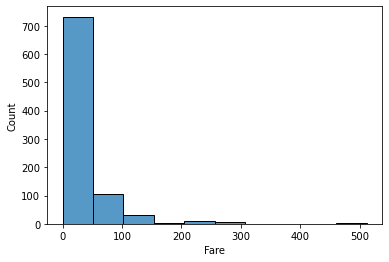

In [161]:
sns.histplot(x="Fare",data=df,bins=10)
plt.show()

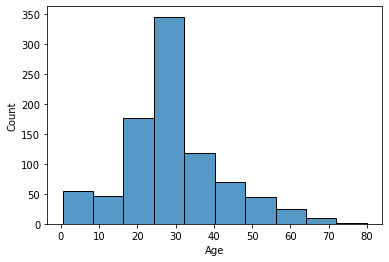

In [162]:
sns.histplot(x="Age",data=df,bins=10)
plt.show()

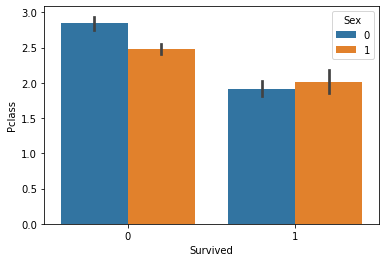

In [163]:
sns.barplot(x="Survived",y="Pclass",data=df,hue="Sex")
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

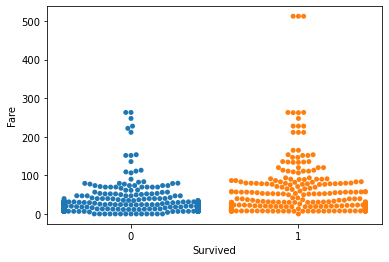

In [164]:
sns.swarmplot(x="Survived",y="Fare",data=df)

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

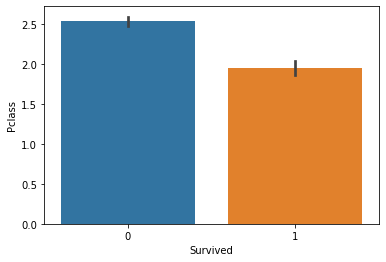

In [165]:
sns.barplot(x="Survived",y="Pclass",data=df)

In [166]:
df["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [167]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [168]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [169]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

PassengerId       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Survived       AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Pclass          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Sex            AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Age            AxesSubplot(0.766379,0.749828;0.133621x0.130172)
SibSp             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Parch          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Fare            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Embarked       AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

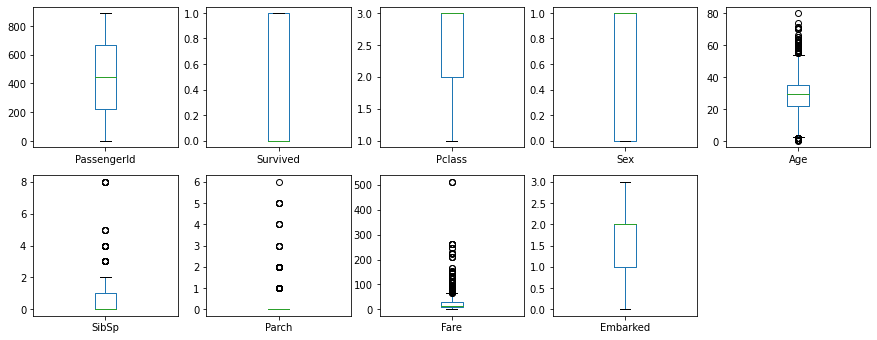

In [170]:
df.plot(kind="box",subplots=True,layout=(5,5),figsize=(15,15))

REDUCING THE COLUMNS BY ADDING SIMILAR COLUMNS

In [171]:
df["FamilySize"]=df["Parch"] + df["SibSp"] + 1
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22.000000,1,0,7.2500,2,2
1,2,1,1,0,38.000000,1,0,71.2833,0,2
2,3,1,3,0,26.000000,0,0,7.9250,2,1
3,4,1,1,0,35.000000,1,0,53.1000,2,2
4,5,0,3,1,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2,1
887,888,1,1,0,19.000000,0,0,30.0000,2,1
888,889,0,3,0,29.699118,1,2,23.4500,2,4
889,890,1,1,1,26.000000,0,0,30.0000,0,1


In [172]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [173]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
Fare           4.787317
Embarked      -1.246689
FamilySize     2.727441
dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

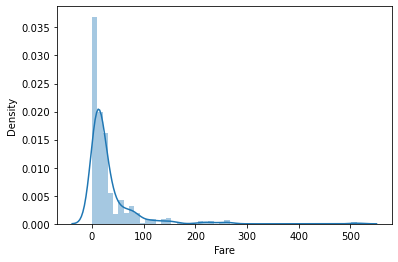

In [174]:
sns.distplot(df["Fare"])

USING Z-SCORE METHOD TO REMOVE THE OUTLIERS

In [175]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.50244517, 0.58111394,
        0.05915988],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.78684529, 1.93846038,
        0.05915988],
       [1.72233219, 1.2669898 , 0.82737724, ..., 0.48885426, 0.58111394,
        0.56097483],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 0.17626324, 0.58111394,
        1.29942929],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.04438104, 1.93846038,
        0.56097483],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.49237783, 0.67867322,
        0.56097483]])

In [176]:
df_new=df[(z<3).all(axis=1)]
df_new

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,1,22.000000,7.2500,2,2
1,2,1,1,0,38.000000,71.2833,0,2
2,3,1,3,0,26.000000,7.9250,2,1
3,4,1,1,0,35.000000,53.1000,2,2
4,5,0,3,1,35.000000,8.0500,2,1
...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,13.0000,2,1
887,888,1,1,0,19.000000,30.0000,2,1
888,889,0,3,0,29.699118,23.4500,2,4
889,890,1,1,1,26.000000,30.0000,0,1


In [177]:
df_new.skew()

PassengerId    0.004295
Survived       0.473597
Pclass        -0.662336
Sex           -0.655825
Age            0.275104
Fare           2.326967
Embarked      -1.263506
FamilySize     1.920107
dtype: float64

In [178]:
df_new["Fare"]=df_new["Fare"].replace(0,1)
from scipy.stats import boxcox
df_new["Fare"]=boxcox(df_new["Fare"],0.5)

In [179]:
df_new.skew()

PassengerId    0.004295
Survived       0.473597
Pclass        -0.662336
Sex           -0.655825
Age            0.275104
Fare           1.428200
Embarked      -1.263506
FamilySize     1.920107
dtype: float64

THUS SKEWNESS IS REMOVED FROM THE DATASET USING Z-SCORE AND BOXCOX METHOD

<AxesSubplot:>

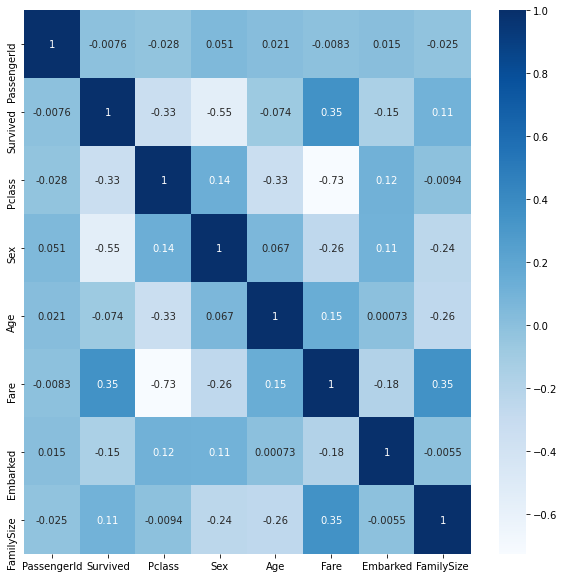

In [180]:
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True,cmap="Blues")

In [181]:
df_new.drop("PassengerId",axis=1,inplace=True)

In [182]:
df_new

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,1,22.000000,3.385165,2,2
1,1,1,0,38.000000,14.885888,0,2
2,1,3,0,26.000000,3.630275,2,1
3,1,1,0,35.000000,12.573949,2,2
4,0,3,1,35.000000,3.674504,2,1
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,5.211103,2,1
887,1,1,0,19.000000,8.954451,2,1
888,0,3,0,29.699118,7.685040,2,4
889,1,1,1,26.000000,8.954451,0,1


MACHINE LEARNING PROCESS

In [183]:
x=df_new.iloc[:,1:]
x

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,1,22.000000,3.385165,2,2
1,1,0,38.000000,14.885888,0,2
2,3,0,26.000000,3.630275,2,1
3,1,0,35.000000,12.573949,2,2
4,3,1,35.000000,3.674504,2,1
...,...,...,...,...,...,...
886,2,1,27.000000,5.211103,2,1
887,1,0,19.000000,8.954451,2,1
888,3,0,29.699118,7.685040,2,4
889,1,1,26.000000,8.954451,0,1


In [184]:
y=df_new.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 839, dtype: int64

In [185]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=RandomForestClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8650793650793651 on random state 7


In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=7)

In [187]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.8412698412698413
[[132  21]
 [ 19  80]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       153
           1       0.79      0.81      0.80        99

    accuracy                           0.84       252
   macro avg       0.83      0.84      0.83       252
weighted avg       0.84      0.84      0.84       252



In [188]:
dtc=DecisionTreeClassifier()  #criterion="gini" --->Default / criterion="entropy"
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(preddtc,y_test))
print(confusion_matrix(preddtc,y_test))
print(classification_report(preddtc,y_test))

0.7817460317460317
[[123  27]
 [ 28  74]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       150
           1       0.73      0.73      0.73       102

    accuracy                           0.78       252
   macro avg       0.77      0.77      0.77       252
weighted avg       0.78      0.78      0.78       252



In [189]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(predsvc,y_test))
print(confusion_matrix(predsvc,y_test))
print(classification_report(predsvc,y_test))

0.7023809523809523
[[132  56]
 [ 19  45]]
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       188
           1       0.45      0.70      0.55        64

    accuracy                           0.70       252
   macro avg       0.66      0.70      0.66       252
weighted avg       0.77      0.70      0.72       252



In [190]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

0.7380952380952381
[[127  42]
 [ 24  59]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       169
           1       0.58      0.71      0.64        83

    accuracy                           0.74       252
   macro avg       0.71      0.73      0.72       252
weighted avg       0.76      0.74      0.74       252



CROSS VALIDATION PROCESS

In [191]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(kn,x,y,cv=10)                    
print(score)
print(score.mean())
print(score.std())

[0.69047619 0.66666667 0.79761905 0.76190476 0.78571429 0.72619048
 0.76190476 0.73809524 0.69047619 0.81927711]
0.7438324727481355
0.047942354412463674


In [192]:
score=cross_val_score(svc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.61904762 0.58333333 0.70238095 0.73809524 0.71428571 0.70238095
 0.76190476 0.72619048 0.72619048 0.72289157]
0.6996701090074584
0.052495793086387674


In [193]:
score=cross_val_score(dtc,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.75       0.77380952 0.75       0.72619048 0.8452381  0.79761905
 0.83333333 0.70238095 0.80952381 0.81927711]
0.7807372346528973
0.045363310264443096


In [194]:
score=cross_val_score(rf,x,y,cv=10)
print(score)
print(score.mean())
print(score.std())

[0.75       0.79761905 0.77380952 0.76190476 0.88095238 0.80952381
 0.83333333 0.69047619 0.80952381 0.8313253 ]
0.7938468158347676
0.05008670954054277


RandomForestClassifier is our best model

hyperparameter tuning process for the best model

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
parameter={"max_depth": np.arange(2,10),
          "criterion": ["gini","entropy"],
          "max_leaf_nodes": np.arange(2,10),
          "max_features": ["auto","sqrt","log2"]}

In [197]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [198]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [199]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'max_leaf_nodes': 8}

In [200]:
final_model=RandomForestClassifier(criterion='entropy',max_depth=9,max_features='auto',max_leaf_nodes=8)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.8174603174603174


Plotting AUC-ROC curve for the best model

In [201]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [202]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.57409677, 0.56750296, 0.24376769, 0.59946848, 0.54864906,
       0.16835061, 0.31355985, 0.22997599, 0.29670382, 0.74788923,
       0.74395429, 0.16644773, 0.15076516, 0.18723642, 0.87387662,
       0.15102383, 0.59843934, 0.76262283, 0.18781753, 0.14235553,
       0.78938303, 0.18619032, 0.29612144, 0.78443325, 0.15242339,
       0.17110402, 0.15076516, 0.14491834, 0.78420574, 0.56498308,
       0.42683454, 0.15103468, 0.82072835, 0.88179401, 0.14401375,
       0.18983524, 0.20440703, 0.33792909, 0.18723642, 0.32987712,
       0.56750296, 0.37971127, 0.20427627, 0.15242339, 0.15618633,
       0.53313636, 0.78249843, 0.31615915, 0.73958734, 0.73131991,
       0.2361445 , 0.31820342, 0.74303074, 0.45420011, 0.63706447,
       0.27982668, 0.13248785, 0.50700079, 0.54368473, 0.84528181,
       0.13908976, 0.14235553, 0.16350369, 0.17812313, 0.83201026,
       0.28519829, 0.35536266, 0.14235553, 0.14401375, 0.34352724,
       0.76262283, 0.22831449, 0.13500763, 0.14491834, 0.17206

In [203]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

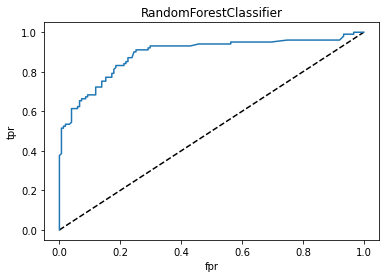

In [204]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RandomForestClassifier")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()

In [205]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))
auc_score

0.8331256966756279

saving the best model

In [206]:
import joblib

joblib.dump(final_model,"Titanicfile.obj")

['Titanicfile.obj']

In [207]:
Titanicfile_from_joblib=joblib.load("Titanicfile.obj")
Titanicfile_from_joblib.predict(x_test)

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)